## Gradient Descent Implementation
Implementing basic gradient descent on the "House Rent Prediction Dataset" dataset from the Kaggle website https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

### Loading The Data and The Necessary Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

house_rents = pd.read_csv('House_Rent_Dataset.csv')

### Basic Feature engineering:

In [3]:
house_rents.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(house_rents[['Size', 'Rent']])
house_rents = pd.DataFrame(scaled_features, columns=['Size', 'Rent'])

In [5]:
house_rents

,Size,Rent
0,0.208960,-0.320026
1,-0.264125,-0.191982
2,0.051265,-0.230395
3,-0.264125,-0.320026
4,-0.185277,-0.352037
...,...,...
4741,0.051265,-0.256004
4742,1.628216,-0.076743
4743,1.233978,0.000084
4744,0.839741,0.128128


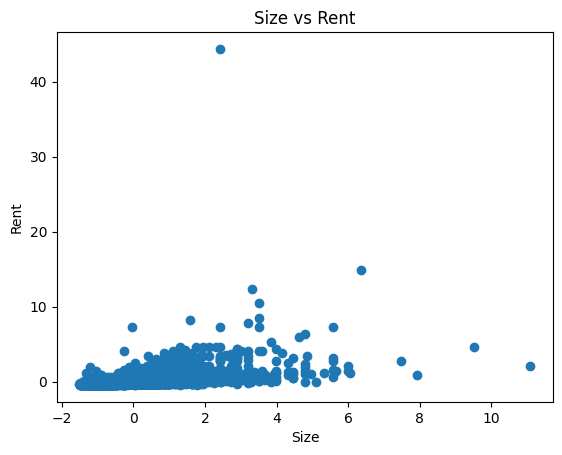

In [7]:
plt.scatter(house_rents['Size'], house_rents['Rent'])
plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Size vs Rent')
plt.show()

In [8]:
# I am only going to use the size feature for convinience
X = house_rents['Size']
y = house_rents['Rent']

### Basic Cost Function and Basic Theta Function for Gradient Descent:

In [9]:
# Making a basic cost function (RMSE)
def compute_cost(X, y, b, w):
    m = len(y)
    f = w * X + b
    cost = ((1/(2*m)) * np.sum(np.square(f - y) ** 0.5))
    return cost

In [10]:
# Making a simple function for theta
def theta(X, y, b, w):
  theta_b = 0
  theta_w = 0
  for x, y in zip(X, y):
    f = w * x + b
    theta_b += np.sign(f - y)
    theta_w += np.sign(f - y) * x
  theta_b /= len(X)
  theta_w /= len(X)
  return theta_b, theta_w

### Gradient Descent:

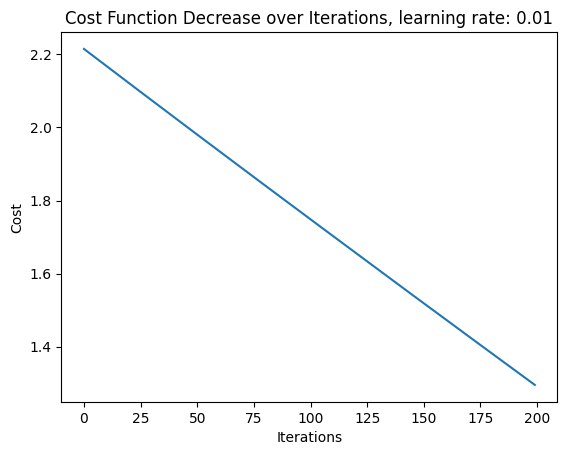

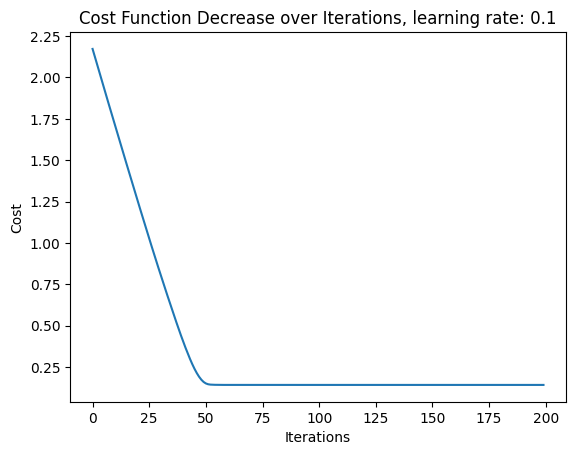

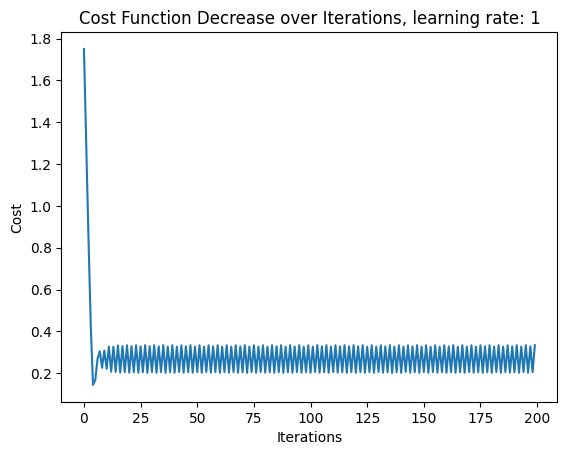

In [11]:
# Making a for loop so that I don't have to copy paste the same code twice.
for i in [0.01, 0.1, 1]:
    # Gradient descent algorithm
    cost_history = np.zeros(200)
    b = 4.33
    w = -0.85
    learning_rate = i
    
    for k in range(200):
        theta_b, theta_w = theta(X, y, b, w)
        b = b - learning_rate * theta_b
        w = w - learning_rate * theta_w

        cost = compute_cost(X, y, b, w)
        cost_history[k] = cost

    # Plotting the cost history
    plt.plot(cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost Function Decrease over Iterations, learning rate: {i}')
    plt.show()

### Gradient Descent With Adapting Learning Rate:

In [12]:
# A basic function to adjust the learning rate (it multiplies because even when the lr was 1 it was still too small)
def adaptive_learning_rate(initial_lr, iteration, decay_rate):
    return initial_lr / (1 + grow_rate * iteration)

highest learning rate reached: 0.005022601707684581


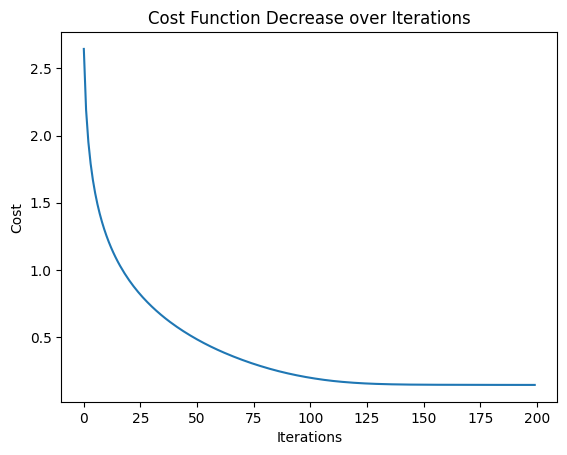

In [16]:
cost_history = np.zeros(200)
b = 4.33
w = -0.85
initial_lr = 10
grow_rate = 10

for i in range(200):
    # Gradient descent algorithm
    theta_b, theta_w = theta(X, y, b, w)
    lr = adaptive_learning_rate(initial_lr, i, grow_rate)
    b = b - lr * theta_b
    w = w - lr * theta_w

    cost = compute_cost(X, y, b, w)
    cost_history[i] = cost

print(f'highest learning rate reached: {lr}')

# Plotting the cost history
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Decrease over Iterations')
plt.show()